In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# **Data preprocessing**

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/insurance_prediction/aug_train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/insurance_prediction/aug_test.csv')
ans = np.load('/content/drive/MyDrive/insurance_prediction/answer.npy')

In [5]:
df2['Response'] = ans
df = pd.concat([df1, df2]).sample(frac=1, random_state=0).reset_index(drop=True)

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,250452,Male,35,1,28.0,0,1-2 Year,Yes,39183.0,26.0,142,0
1,366939,Female,49,1,37.0,0,1-2 Year,Yes,35649.0,26.0,178,0
2,185895,Male,36,1,28.0,0,1-2 Year,Yes,22364.0,26.0,145,1
3,454455,Male,38,1,41.0,0,< 1 Year,Yes,2630.0,157.0,145,1
4,387968,Female,66,1,3.0,1,1-2 Year,No,15088.0,26.0,232,0


In [5]:
df.shape

(460427, 12)

In [6]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
df.nunique()

id                      460427
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           51002
Policy_Sales_Channel       156
Vintage                    290
Response                     2
dtype: int64

In [5]:
print('Size of dataframe', len(df))
print('Fraction not opting for vehicle insurance:', round((Counter(df['Response'])[0]/len(df))*100), '%')
print('Fraction opting for vehicle insurance:', round((Counter(df['Response'])[1]/len(df))*100), '%')

Size of dataframe 460427
Fraction not opting for vehicle insurance: 84 %
Fraction opting for vehicle insurance: 16 %


In [6]:
mdf1 = df[df['Response']==0].sample(n=8400, random_state=9)
mdf2 = df[df['Response']==1].sample(n=1600, random_state=9)
mdf = pd.concat([mdf1, mdf2]).sample(frac=1, random_state=0).reset_index(drop=True)

print('Size of reduced dataframe', len(mdf))
print('Fraction not opting for vehicle insurance:', round((Counter(mdf['Response'])[0]/len(mdf))*100), '%')
print('Fraction opting for vehicle insurance:', round((Counter(mdf['Response'])[1]/len(mdf))*100), '%')

Size of reduced dataframe 10000
Fraction not opting for vehicle insurance: 84 %
Fraction opting for vehicle insurance: 16 %


In [7]:
df = mdf.copy()

In [52]:
df.shape

(10000, 12)

In [8]:
df.drop(columns=['id'], inplace=True)
categorical_features = [x for x in df.columns.values if x not in ['Age', 'Annual_Premium', 'Response']]
df = pd.get_dummies(df, columns = categorical_features)
df

,Age,Annual_Premium,Response,Gender_Female,Gender_Male,Driving_License_0,Driving_License_1,Region_Code_0.0,Region_Code_1.0,Region_Code_2.0,...,Vintage_290,Vintage_291,Vintage_292,Vintage_293,Vintage_294,Vintage_295,Vintage_296,Vintage_297,Vintage_298,Vintage_299
0,31,31737.0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67,43707.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,77,2630.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,28204.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49,47437.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,35,41013.0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,25,30725.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,41,45369.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,46,29619.0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


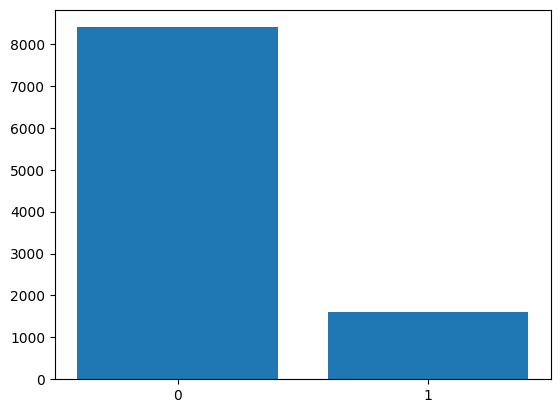

In [57]:
plt.bar(Counter(df['Response']).keys(),Counter(df['Response']).values())
plt.xticks([0,1])
plt.show()

In [9]:
features = list(df.columns.values)
features.remove('Response')

labels = ['Response']

In [10]:
X = df[features]
y = df[labels]

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))

scaled_X = scaler.fit_transform(X)
pd.DataFrame(scaled_X, columns=X.columns.values)

,Age,Annual_Premium,Gender_Female,Gender_Male,Driving_License_0,Driving_License_1,Region_Code_0.0,Region_Code_1.0,Region_Code_2.0,Region_Code_3.0,...,Vintage_290,Vintage_291,Vintage_292,Vintage_293,Vintage_294,Vintage_295,Vintage_296,Vintage_297,Vintage_298,Vintage_299
0,0.171875,0.124894,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.734375,0.176256,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.890625,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.062500,0.109735,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.453125,0.192261,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.234375,0.164696,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.078125,0.120552,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.328125,0.183387,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.406250,0.115806,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Data Modelling**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=9)

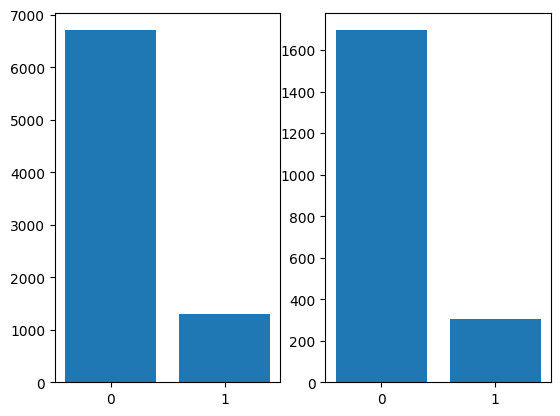

In [14]:
plt.subplot(1,2,1)
plt.bar(Counter(y_train['Response']).keys(),Counter(y_train['Response']).values())
plt.xticks([0,1])
plt.subplot(1,2,2)
plt.bar(Counter(y_test['Response']).keys(),Counter(y_test['Response']).values())
plt.xticks([0,1])
plt.show()

## Base classifier

In [ ]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

In [74]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1696
           1       0.49      0.29      0.37       304

    accuracy                           0.85      2000
   macro avg       0.69      0.62      0.64      2000
weighted avg       0.82      0.85      0.83      2000



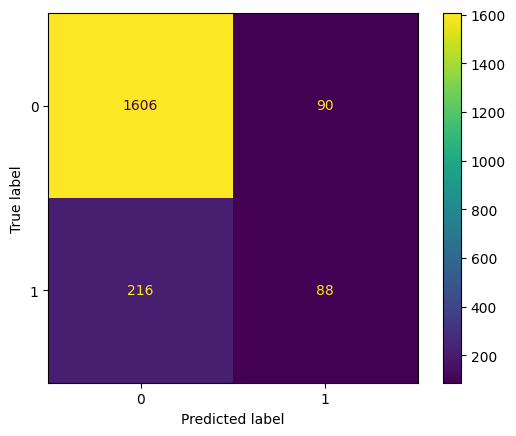

In [78]:
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Hyperparameter tuning with different scoring metrics

In [15]:
n_estimators = [10, 50, 100, 200, 500]
max_features = [None, 'sqrt', 'log2']
class_weight = [None, 'balanced']
n_jobs = [-1]

grid_rf = {'n_estimators': n_estimators,
           'max_features': max_features,
           'class_weight': class_weight,
           'n_jobs': n_jobs}

### Scoring metric: Accuracy

In [ ]:
randomforest_gridsearch_acc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=5, scoring='accuracy', verbose=4)
randomforest_gridsearch_acc.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1696
           1       0.51      0.28      0.36       304

    accuracy                           0.85      2000
   macro avg       0.69      0.61      0.64      2000
weighted avg       0.82      0.85      0.83      2000



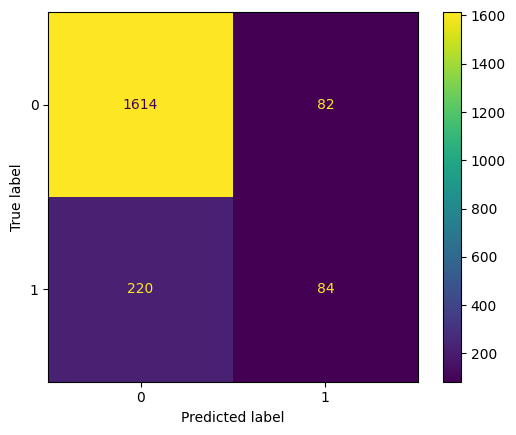

In [119]:
model = randomforest_gridsearch_acc.best_estimator_
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred)).plot()
plt.show()

### Scoring metric: F-score

In [ ]:
randomforest_gridsearch_f1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=5, scoring='f1_weighted', verbose=4)
randomforest_gridsearch_f1.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1696
           1       0.48      0.47      0.48       304

    accuracy                           0.84      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.84      0.84      0.84      2000



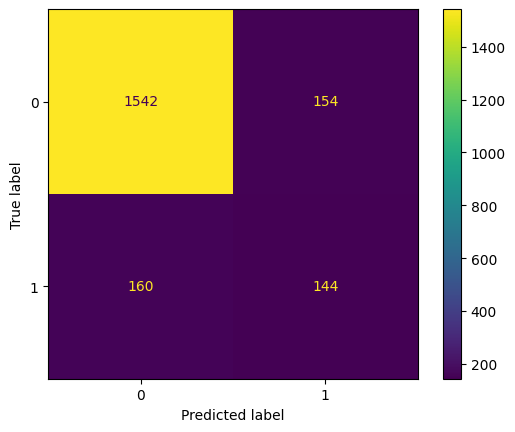

In [111]:
model = randomforest_gridsearch_f1.best_estimator_
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred)).plot()
plt.show()

### Scoring metric: ROC AUC

In [ ]:
randomforest_gridsearch_roc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=5, scoring='roc_auc_ovo_weighted', verbose=4)
randomforest_gridsearch_roc.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1696
           1       0.50      0.52      0.51       304

    accuracy                           0.85      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.85      0.85      0.85      2000



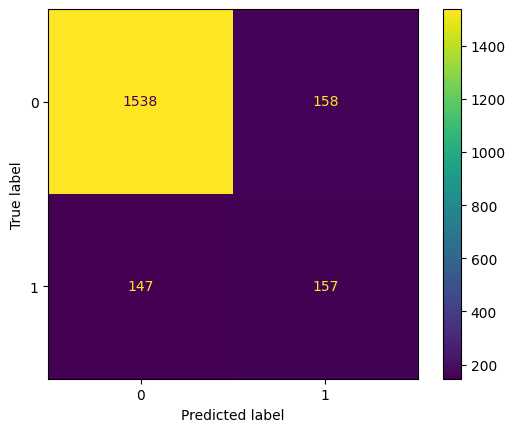

In [122]:
model = randomforest_gridsearch_roc.best_estimator_
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred)).plot()
plt.show()

# **Synthetic Minority oversampling technique (SMOTE)**

## Oversampling minority class

In [16]:
oversampler = SMOTE(sampling_strategy='auto', k_neighbors=3)

print('Before oversampling: ', Counter(y_train['Response']))

X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)

print('After oversampling: ', Counter(y_train_os['Response']))


Before oversampling:  Counter({0: 6704, 1: 1296})
After oversampling:  Counter({0: 6704, 1: 6704})


              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1696
           1       0.47      0.62      0.54       304

    accuracy                           0.84      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.86      0.84      0.85      2000



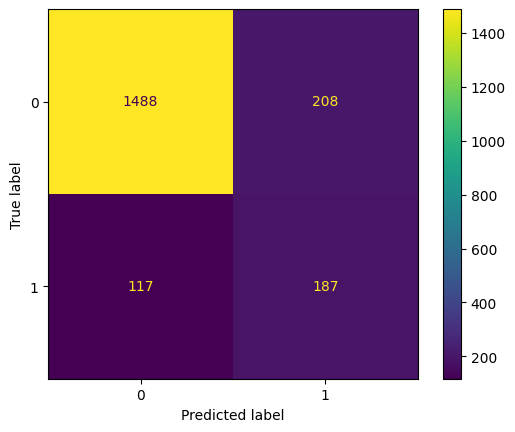

In [21]:
model = RandomForestClassifier()
model.fit(X_train_os, y_train_os)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred)).plot()
plt.show()

## Oversampling minority class and undersampling majority class

In [13]:
oversampler = SMOTE(sampling_strategy=0.3, k_neighbors=3)
undersampler = RandomUnderSampler(sampling_strategy=0.6)

print('Before synthetic oversampling: ', Counter(y_train['Response']))

X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)

print('After oversampling minority class: ', Counter(y_train_os['Response']))

X_train_os_us, y_train_os_us = undersampler.fit_resample(X_train_os, y_train_os)

print('After undersampling majority class: ', Counter(y_train_os_us['Response']))

Before synthetic oversampling:  Counter({0: 6704, 1: 1296})
After oversampling minority class:  Counter({0: 6704, 1: 2011})
After undersampling majority class:  Counter({0: 3351, 1: 2011})


              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1696
           1       0.46      0.77      0.57       304

    accuracy                           0.82      2000
   macro avg       0.70      0.80      0.73      2000
weighted avg       0.88      0.82      0.84      2000



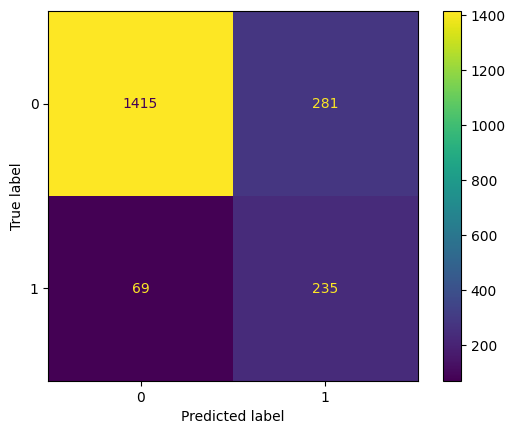

In [14]:
model = RandomForestClassifier()
model.fit(X_train_os_us, y_train_os_us)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred)).plot()
plt.show()

### Scoring metric: F-score

In [ ]:
randomforest_gridsearch_f1_os_us = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=5, scoring='f1_weighted', verbose=4)
randomforest_gridsearch_f1_os_us.fit(X_train_os_us, y_train_os_us)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1696
           1       0.45      0.79      0.58       304

    accuracy                           0.82      2000
   macro avg       0.71      0.81      0.73      2000
weighted avg       0.88      0.82      0.84      2000



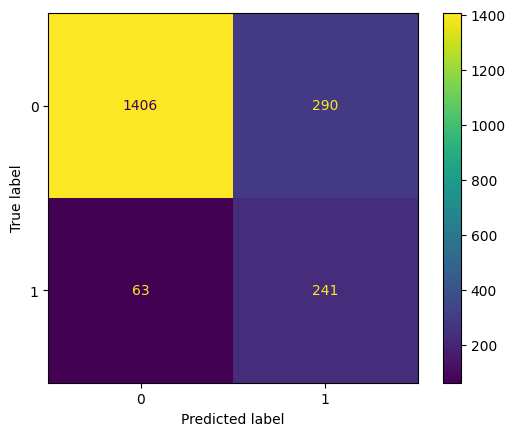

In [21]:
model = randomforest_gridsearch_f1_os_us.best_estimator_
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred)).plot()
plt.show()

### Scoring metric: Precision

In [ ]:
randomforest_gridsearch_pres_os_us = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=5, scoring='precision_weighted', verbose=4)
randomforest_gridsearch_pres_os_us.fit(X_train_os_us, y_train_os_us)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1696
           1       0.45      0.78      0.57       304

    accuracy                           0.82      2000
   macro avg       0.70      0.81      0.73      2000
weighted avg       0.88      0.82      0.84      2000



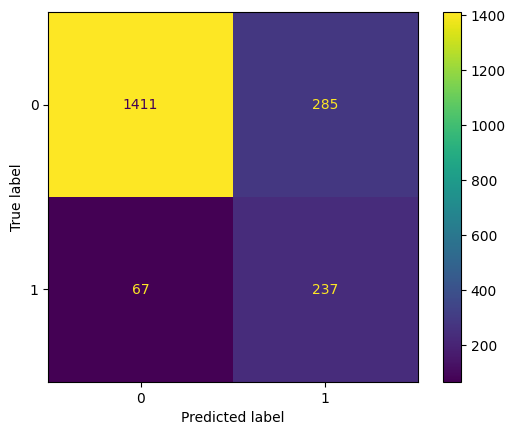

In [26]:
model = randomforest_gridsearch_pres_os_us.best_estimator_
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred)).plot()
plt.show()